# 1. 项目背景

《老友记》是一部备受欢迎的美国情景喜剧，由David Crane和Marta Kauffman创作，于1994年至2004年间播放。该剧讲述了六位年轻人在纽约的生活，以及他们之间的友谊、爱情和生活经历。由于其风趣、幽默的对白和真实的情感描绘，《老友记》在全球范围内赢得了大量观众。

LDA（Latent Dirichlet Allocation）主题分析是一种文本挖掘和机器学习技术，旨在从大量文本数据中发现主题结构。该方法假设每个文档都是由多个主题组成，而每个主题又由一组单词表示。LDA的应用领域包括信息检索、社交媒体分析、新闻主题挖掘等。


研究者们对《老友记》进行主题分析的兴趣可能源自以下几个方面：

1. 剧情深度分析： 通过LDA主题分析，《老友记》的剧本可以被分解为不同的主题，揭示剧情的深度和多样性。这有助于理解故事情节的发展、人物关系的演变以及情景喜剧的幽默元素。

2. 观众反馈分析： 通过分析观众对《老友记》的评论、讨论和反馈，可以了解哪些主题引起了观众的关注和讨论。这有助于制片人和编剧更好地了解观众的反应，从而指导后续剧集的制作方向。

3. 文本挖掘技术应用： 将LDA等文本挖掘技术应用于影视剧本分析，可以为电视剧的创作和改进提供新的方法。这种方法也可以在其他文本数据集上得到推广应用，拓展到更广泛的娱乐产业或文本分析领域。

4. 文化研究角度： 通过主题分析，研究者可以深入挖掘《老友记》所反映的文化元素、社会现象和时代特征。这有助于理解该剧在文化中的地位以及对观众产生的影响。

在本研究中，利用LDA主题分析技术对《老友记》情景喜剧的剧本进行建模，旨在深入挖掘该剧的主题结构，揭示其故事内涵和文本特征。这样的分析有望为电视剧创作、文本挖掘技术的应用以及文化研究领域提供有益的见解。

# 2. 数据集介绍

本数据集来源于kaggle，《老友记》是一部美国情景喜剧，由大卫·克兰和玛尔塔·考夫曼创作，于1994年9月22日至2004年5月6日在美国全国广播公司播出，共十季。这部剧由詹妮弗·安妮斯顿、柯特妮·考克斯、丽莎·库卓、马特·勒布朗、马修·佩里和大卫·修默主演，围绕着六个住在纽约曼哈顿的二三十岁的朋友展开。该系列由Bright/Kauffman/Crane Productions与华纳兄弟电视公司联合制作。最初的执行制片人是凯文·s·布莱特、考夫曼和克兰。原始数据集共有67373条，6个特征变量，各变量含义如下：

text:对话作为文本

speaker:演讲者的名字

season:季节号

episode：第1集

scene:场景编号

utterance:话语数

# 3. 技术工具

Python版本:3.9

代码编辑器：jupyter notebook

# 4. 实验过程
## 4.1 导入数据

In [2]:
import pandas as pd
friends_data = pd.read_csv('friends.csv')
friends_data.head()

,text,speaker,season,episode,scene,utterance
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4
4,"(They all stare, bemused.)",Scene Directions,1,1,1,5


## 4.2 数据预处理

In [9]:
# 导入库、类和数据集

import re
import nltk

from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Xinwen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Xinwen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Xinwen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Xinwen\AppData\Roaming\nltk_data...


True

为了消除对话中的冗余词，我使用了Gensim库提供的STOPWORDS数据集，其中包含337个最常用的停止词的汇编。

In [10]:
# 检查gensim中的停用词列表

print(STOPWORDS)
print(len(STOPWORDS))

frozenset({'yours', 'all', 'describe', 'itself', 'at', 'around', 'de', 'therein', 'very', 'serious', 'keep', 'whose', 'say', 'noone', 'two', 'until', 'beforehand', 'often', 'that', 'using', 'otherwise', 'top', 'such', 'within', 'for', 'your', 'anywhere', 'ours', 'why', 'cannot', 'on', 'though', 'fill', 'most', 'there', 'moreover', 'of', 'beside', 'off', 'sometimes', 'or', 'hers', 'an', 'inc', 'latter', 'kg', 'herein', 'above', 'enough', 'me', 'various', 'empty', 'anyway', 'others', 'my', 'over', 'whereupon', 'couldnt', 'make', 'once', 'also', 'his', 'last', 'next', 'ourselves', 'what', 'sixty', 'eight', 'further', 'amongst', 'thin', 'mine', 'in', 'other', 'than', 'only', 'without', 'however', 'formerly', 'each', 'meanwhile', 'some', 'when', 'could', 'never', 'one', 'eleven', 'sometime', 'due', 'mostly', 'indeed', 'will', 'anything', 'get', 'ie', 'made', 'co', 'towards', 'because', 'namely', 'put', 'after', 'up', 'own', 'anyone', 'computer', 'anyhow', 'must', 'became', 'nine', 'show', '

为了只关注角色之间的对话文本，我首先删除了不必要的列。

In [11]:
# 删除未使用的列

friends_data = friends_data.drop(columns=['scene','utterance'], axis=1)
friends_data.head()

KeyError: "['scene', 'utterance'] not found in axis"

随后，我进行了预处理阶段，去掉了标点符号和停顿词。在此之后，我将所有单词转换为小写，然后对文本进行标记、词干提取和依序排列。

In [12]:
# 初始化Porter词干分析器和WordNet词形化器
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
 
# Gensim停用词
gensim_stop_words = set(stopwords.words('english'))
 
# 删除标点符号、停止词、转换为小写、标记化、词干和引体化
def preprocess_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text) # 从文本中删除所有非单词和非空白字符
    stop_words = set(gensim_stop_words)
    words = word_tokenize(cleaned_text.lower())
    filtered_words = [word for word in words if word not in stop_words and len(word) >= 4] # 删除少于4个字符的单词
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    return lemmatized_words
 
# 对“text”列应用预处理
friends_data['processed_text'] = friends_data['text'].apply(preprocess_text)
friends_data.head()

,text,speaker,season,episode,processed_text
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,"[there, noth, tell, work]"
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,"[cmon, your, go, there, someth, wrong]"
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,"[right, joey, nice, hump, hump, hairpiec]"
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,"[wait, chalk]"
4,"(They all stare, bemused.)",Scene Directions,1,1,"[stare, bemus]"


## 4.3词云图可视化
   
   在完成文本预处理后，我创建了最初的可视化来探索《老友记》角色之间的对话主题。我使用了WordCloud库生成的词云。这个工具根据单词的频率自动缩放单词的大小，突出显示流行的单词，同时减少不常见的单词的大小。

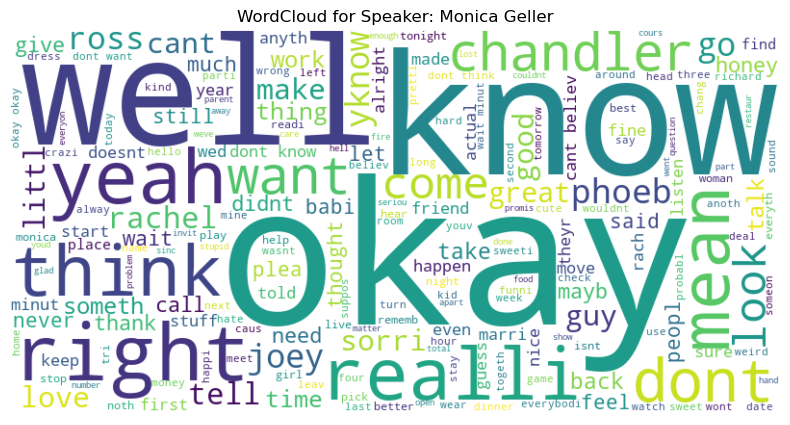

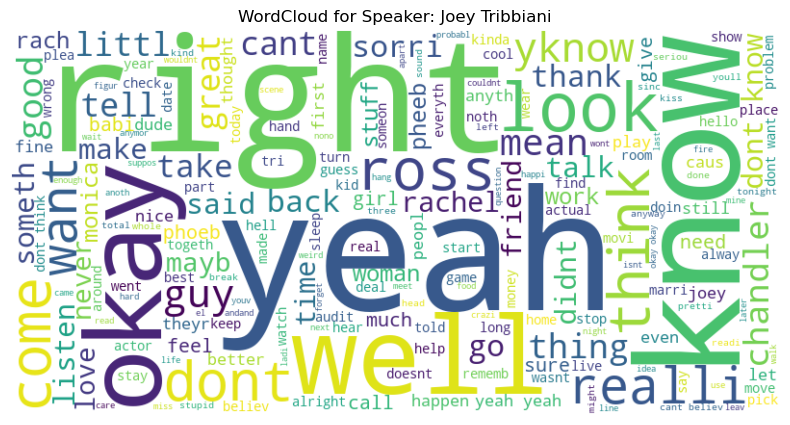

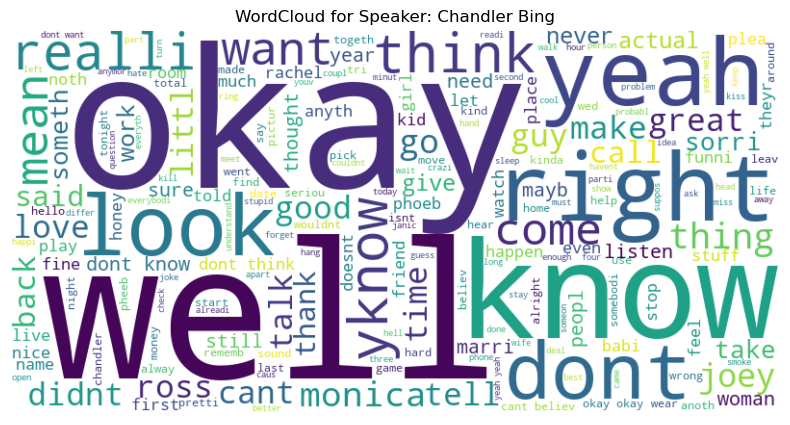

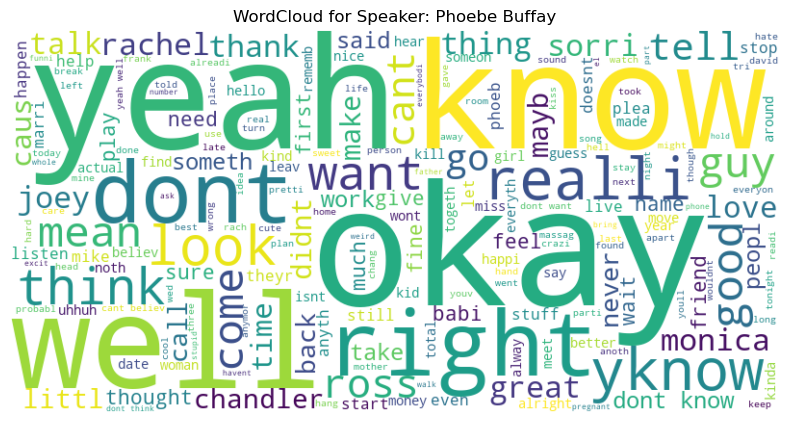

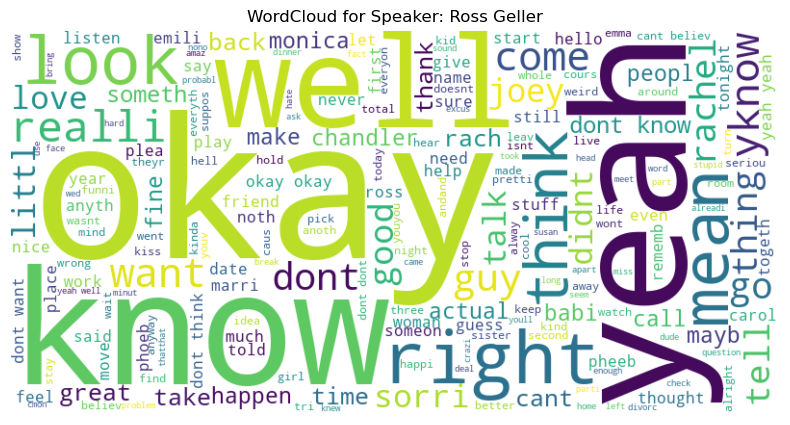

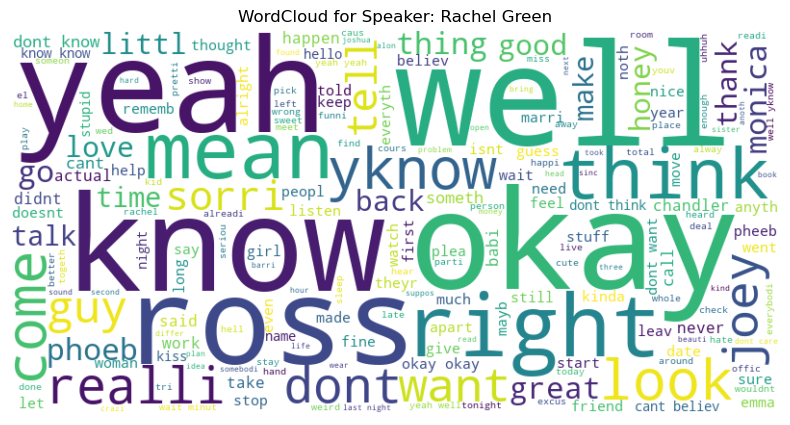

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
# 为特定说话人生成词云的函数
def generate_wordcloud_for_speaker(speaker_name, text_data):
    
    # 组合特定说话者的所有文本数据，并将令牌连接到单个字符串中
    speaker_text = ' '.join(' '.join(tokens) for tokens in text_data[text_data['speaker'] == speaker_name]['processed_text'])
    
    # 创建WordCloud对象
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(speaker_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Speaker: {speaker_name}')
    plt.show()
 
# 要可视化的具体演讲者列表
speakers_to_visualize = ["Monica Geller", "Joey Tribbiani", "Chandler Bing", "Phoebe Buffay", "Ross Geller", "Rachel Green"]
 
# 为每个角色绘制词云
for speaker_name in speakers_to_visualize:
    generate_wordcloud_for_speaker(speaker_name, friends_data)

词云提供了每个人物最常用的词的视觉表示，其中较大的词在他们的对话中表示更高的频率和重要性。正如我们从可视化中看到的那样，他们在日常对话中主要谈论彼此和其他随意的话题，就像大多数朋友群一样!

## 4.4 为LDA模型训练准备数据
在下一节中，我的目标是使用LDA模型训练来更深入地研究和探索角色所从事的典型主题。

In [15]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pprint import pprint
import numpy as np
 
# 创建字典和语料库
# 从标记化的文本数据创建字典
id2word = Dictionary(friends_data['processed_text'])
# 文件频率
corpus = [id2word.doc2bow(tokens) for tokens in friends_data['processed_text']]

## 4.5 确定主题个数K
使用网格搜索找到最佳数量的主题

为了有效地训练LDA模型，需要预定义数量的主题。为了确定主题的最佳数量，我在一个范围内(从3到最多30个主题)进行了网格搜索。在每次迭代中生成的模型将使用一致性评分进行评估。这种方法旨在确定产生最有意义结果的主题数量。

Optimal Number of Topics: 3
Coherence Score for Optimal Number of Topics: 0.5980617972643857


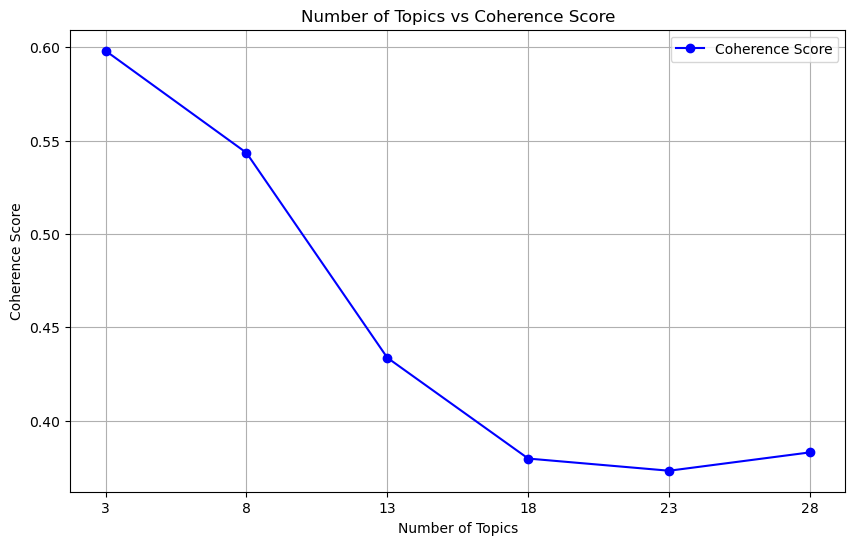

In [16]:
from gensim.models.coherencemodel import CoherenceModel
# 指定要在其中搜索的主题数量范围
min_topics = 3
max_topics = 30
step_size = 5
topics_range = range(min_topics, max_topics+1, step_size)
 
# 执行网格搜索并计算不同数量主题的一致性分数
coherence_scores = []
for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=friends_data['processed_text'], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
 
# 找出具有最高连贯分数的最佳主题数量
optimal_num_topics = topics_range[np.argmax(coherence_scores)]
print("Optimal Number of Topics:", optimal_num_topics)
print("Coherence Score for Optimal Number of Topics:", max(coherence_scores))
 
# 绘制主题数与连贯分数之间的关系
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', color='b', label='Coherence Score')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Number of Topics vs Coherence Score')
plt.xticks(topics_range)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print(coherence_scores)
print(optimal_num_topics)

[0.5980617972643857, 0.5434331194347837, 0.433711821154751, 0.3797558831205502, 0.3732460915785507, 0.3830688495062908]
3


## 4.6 LDA模型训练
    在进行网格搜索分析之后，很明显，我们的数据集的最佳主题数量被确定为3。这个特定数量的话题产生了最高的连贯分数，表明对话中的话题更好地对齐。随后，我利用这个最优值作为训练LDA模型的输入参数，以确保对Friends对话中呈现的潜在主题进行集中而深刻的探索。

In [18]:
# LDA模型的主题数
num_topics = 3
# 构建LDA模型
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
# 打印主题
pprint(lda_model.print_topics())

[(0,
  '0.026*"scene" + 0.026*"think" + 0.025*"realli" + 0.021*"like" + '
  '0.020*"well" + 0.019*"joey" + 0.017*"know" + 0.013*"ross" + 0.012*"love" + '
  '0.012*"phoeb"'),
 (1,
  '0.044*"okay" + 0.032*"your" + 0.026*"that" + 0.022*"good" + 0.019*"right" + '
  '0.018*"well" + 0.018*"go" + 0.016*"want" + 0.016*"great" + 0.015*"sorri"'),
 (2,
  '0.047*"yeah" + 0.038*"know" + 0.032*"dont" + 0.025*"monica" + '
  '0.024*"rachel" + 0.021*"chandler" + 0.020*"come" + 0.017*"cant" + '
  '0.015*"ross" + 0.014*"time"')]


用连贯性评分评价LDA模型

在前面的步骤中，我确定了主题的最佳数量，我利用一致性分数来评估LDA模型。但是，让我们在本节中更详细地探讨这个分数。

主题一致性指标通过评估该主题中排名较高的单词之间的语义相似性来评估单个主题。Gensim库提供了一个类，实现了四个最著名的相干模型:u_mass, c_v, c_uci, c_npmi。

在《老友记》的数据集中，文本由剧中角色之间的日常对话组成。由于这种简单直接的语言，不需要复杂的模型来评估主题一致性。在LDA分析中，我选择了c_v相干模型。它具体评估词的共现性和主题的独特性。考虑到随意对话的性质，这种方法为我们的数据集提供了充分和合适的评估。


In [19]:
# 计算连贯分数
coherence_model = CoherenceModel(model=lda_model, texts=friends_data['processed_text'], dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()
# 打印结果
print(f'Coherence Score: {coherence_score}')

Coherence Score: 0.5713777989041134


考虑到c_v连贯分数的范围为0 ~ 1，当c_v连贯分数为0.567时，表明从《老友记》数据集中提取的主题具有合理的可解释性和连贯性。

## 4.7 主题建模可视化
        利用Python中的pyLDAvis交互式可视化库，我为前面在“Friends”数据集中发现的3个主题生成了交互式可视化。这些可视化已保存为HTML文件。您可以在web浏览器中手动打开HTML文件以与可视化交互。

In [20]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
 
# 如果'results'目录不存在，创建它
os.makedirs('results', exist_ok=True)
 
# 准备LDA可视化数据
LDAvis_data_filepath = './results/ldavis_prepared_' + str(num_topics) + '.pkl'
 
# 如果您还没有准备可视化数据，请创建它
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
 
# 将交互式可视化保存为HTML文件
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_' + str(num_topics) + '.html')
 
# 打印一条消息，指出HTML文件的保存位置
print(f"Interactive LDA visualization saved as 'ldavis_prepared_{num_topics}.html'")

ModuleNotFoundError: No module named 'pyLDAvis'